# 

In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
import os
path = '/Users/elliot/Desktop/melatonin (1)/' 
print("Looking in:", path)

#filter for CSV files
all_csv_files = glob.glob(path + "/*.csv")
print("Filtered CSV files:", all_csv_files)

#concatenate if there are CSV files
if all_csv_files:
    df = pd.concat((pd.read_csv(f) for f in all_csv_files))
    print("Dataframe head:", df.head()) 
else:
    print("No CSV files found in the specified directory.")


Looking in: /Users/elliot/Desktop/melatonin (1)/
Filtered CSV files: ['/Users/elliot/Desktop/melatonin (1)/B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements-10mg.csv', '/Users/elliot/Desktop/melatonin (1)/B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets-12mg.csv', "/Users/elliot/Desktop/melatonin (1)/B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin-2mg.csv", '/Users/elliot/Desktop/melatonin (1)/B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets-12mg.csv', '/Users/elliot/Desktop/melatonin (1)/B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies-1mg.csv', '/Users/elliot/Desktop/melatonin (1)/B08CGYFB2Q_VitamaticMelatonin20mgTablets-20mg.csv', '/Users/elliot/Desktop/melatonin (1)/B079TD7HG2_NatrolMelatoninSleepAidGummy-10mg.csv']
Dataframe head:          asin                                      product_title  \
0  B07PF1SN5B  vitafusion Max Strength Melatonin Gummy Supple...   
1  B07PF1SN5B  vitafusion Max Strength Melatonin Gummy Supple...   
2  B07PF1

In [5]:
#dropping these columns as they are irrelevant to model info
columns_to_drop = [
    'asin', 
    'author_badge', 
    'badge', 
    'reviewed_product_attribute',
    'reviewed_variant_asin', 
    'variant_review_url', 
    'author_profile_url', 
    'url', 
    'review_url',
    'review_author',
    'review_date',
    'review_comment_count',
    'no_of_people_reacted_helpful',
    'brand'
]

df_cleaned = df.drop(columns=columns_to_drop)

In [6]:
#checking for nulls 

null_counts = df_cleaned.isnull().sum()
null_counts

product_title        0
average_rating       0
total_reviews        0
review_rating        0
reviewed_country     0
review_text         28
review_header        5
input                0
dtype: int64

In [7]:
# removing rows with null values in 'review_text' and 'review_header' as values are small compared to df shape
df_cleaned = df_cleaned.dropna(subset=['review_text', 'review_header'])


In [8]:
#ensuring no more nulls 

null_counts = df_cleaned.isnull().sum()
null_counts

product_title       0
average_rating      0
total_reviews       0
review_rating       0
reviewed_country    0
review_text         0
review_header       0
input               0
dtype: int64

In [9]:
import re

# regex pattern to extract the dose
dose_pattern = r'(\d+)\s*(?:mg)?'

# to extract dose from product title
def extract_dose(title):
    match = re.search(dose_pattern, title, re.IGNORECASE)
    if match:
        return match.group(1) + "mg"
    else:
        return None

# Adding 'dose' column to df_cleaned
df_cleaned['dose'] = df_cleaned['product_title'].apply(extract_dose)

# displaying the first few rows of the updated DataFrame
df_cleaned


,product_title,average_rating,total_reviews,review_rating,reviewed_country,review_text,review_header,input,dose
0,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Easy to take and use. I bought these because t...,Quick and easy,B07PF1SN5B,10mg
1,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Love these. Great flavor and tasty.,The best gummies,B07PF1SN5B,10mg
2,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,I love these sleepy times gummies! They work e...,Great taste,B07PF1SN5B,10mg
3,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,2,United States,These things are ridiculously hard to chew. Th...,Hard to Chew,B07PF1SN5B,10mg
4,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,1,United States,Mine were all stuck together in one big blob. ...,Mine were melted together,B07PF1SN5B,10mg
...,...,...,...,...,...,...,...,...,...
2695,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,1,United States,Doesn’t taste good at all,Taste like medicine,B079TD7HG2,2mg
2696,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,I have tried many melatonin products over the ...,Only product that works for me,B079TD7HG2,2mg
2697,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,Love to sleep soundly. Don't feel groggy next ...,Sleeping,B079TD7HG2,2mg
2698,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,I wasn't sure one gummy would work but it did....,Great nights sleep,B079TD7HG2,2mg


In [10]:
#ensuring no more nulls in dose
null_counts = df_cleaned.isnull().sum()
null_counts

product_title       0
average_rating      0
total_reviews       0
review_rating       0
reviewed_country    0
review_text         0
review_header       0
input               0
dose                0
dtype: int64

In [11]:
df_cleaned['dose'].value_counts()

dose
12mg     5749
120mg    3197
2mg      2694
10mg     1946
1mg      1294
20mg     1000
Name: count, dtype: int64

In [12]:
#checking for mistaken 120 mg entry
df_120mg = df_cleaned[df_cleaned['dose'] == '120mg']
df_120mg['product_title'].unique()


array(["Puritan's Pride Super Strength Rapid Release Capsules Melatonin 120 Count (Pack of 2)"],
      dtype=object)

In [13]:
# Update the 'dose' values for rows where the product title indicates 120 Count (Pack of 2)
df_cleaned.loc[df_cleaned['product_title'].str.contains("120 Count (Pack of 2)", regex=False), 'dose'] = '2mg'


In [14]:
df_cleaned['dose'].value_counts()

dose
2mg     5891
12mg    5749
10mg    1946
1mg     1294
20mg    1000
Name: count, dtype: int64

In [15]:
###EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/elliot/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


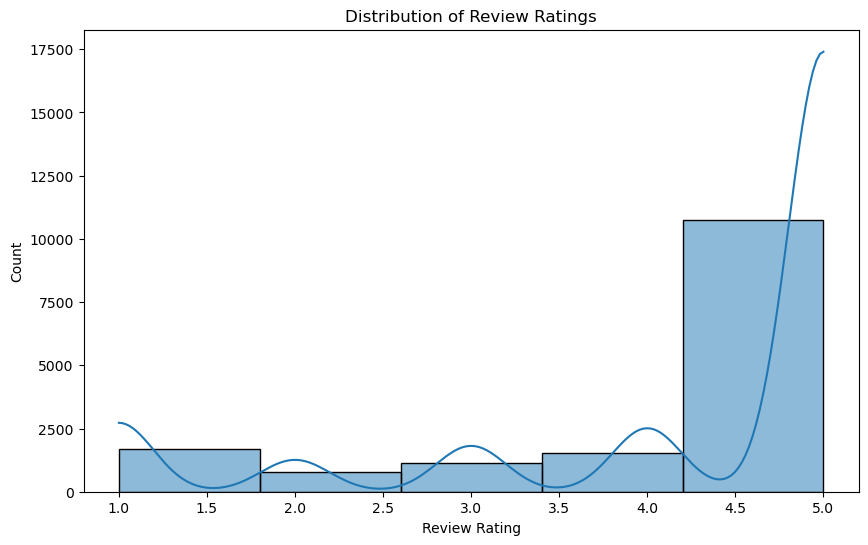

In [17]:
#how many reviews are there for each average rating
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['review_rating'], bins=5, kde=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

In [18]:
#dose distribution range

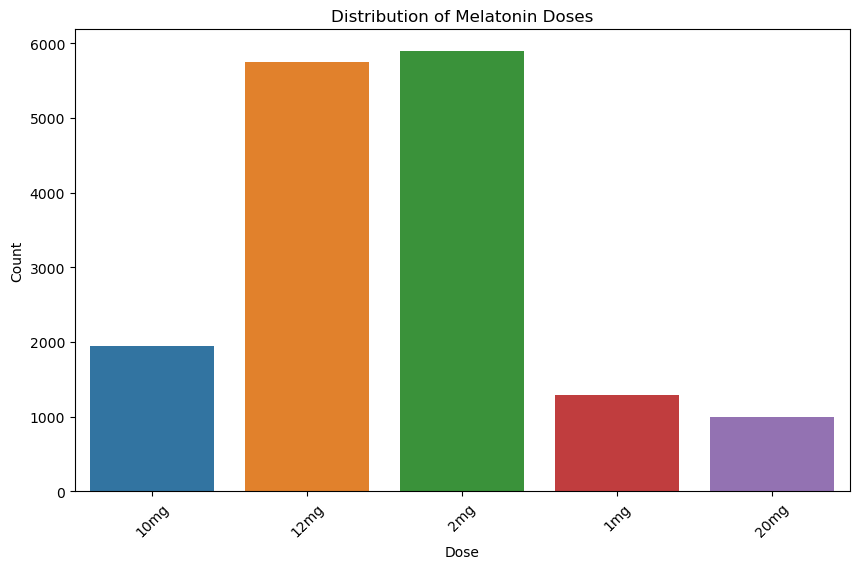

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='dose')
plt.title('Distribution of Melatonin Doses')
plt.xlabel('Dose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

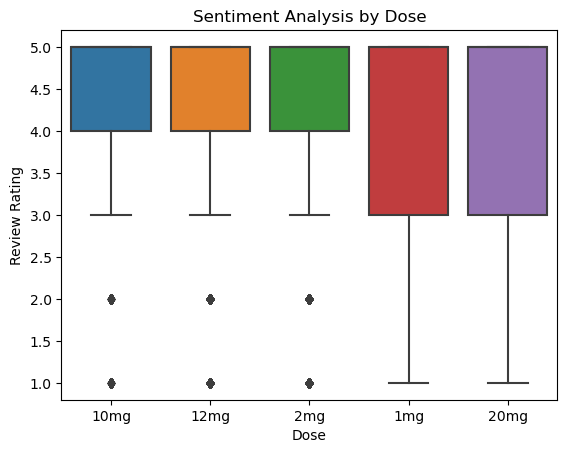

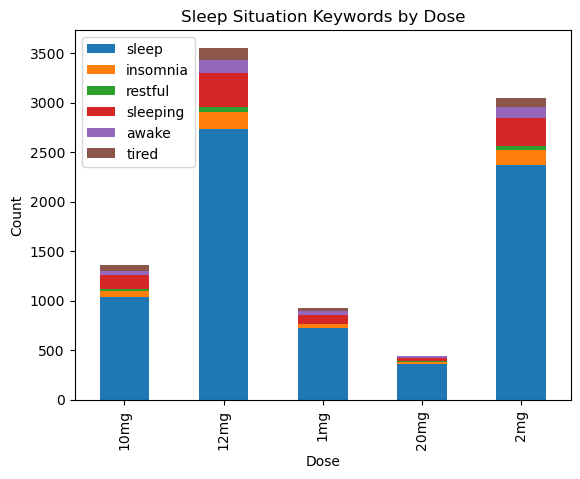

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment analysis
sns.boxplot(data=df_cleaned, x='dose', y='review_rating')
plt.title('Sentiment Analysis by Dose')
plt.xlabel('Dose')
plt.ylabel('Review Rating')
plt.show()

# Sleep situation analysis
sleep_keywords = ['sleep', 'insomnia', 'restful', 'sleeping', 'awake', 'tired']
for keyword in sleep_keywords:
    df_cleaned[keyword] = df_cleaned['review_text'].str.contains(keyword, case=False)

sleep_situation_counts = df_cleaned.groupby('dose')[sleep_keywords].sum()
sleep_situation_counts.plot(kind='bar', stacked=True)
plt.title('Sleep Situation Keywords by Dose')
plt.xlabel('Dose')
plt.ylabel('Count')
plt.show()


In [21]:
##Word Clouds for review text

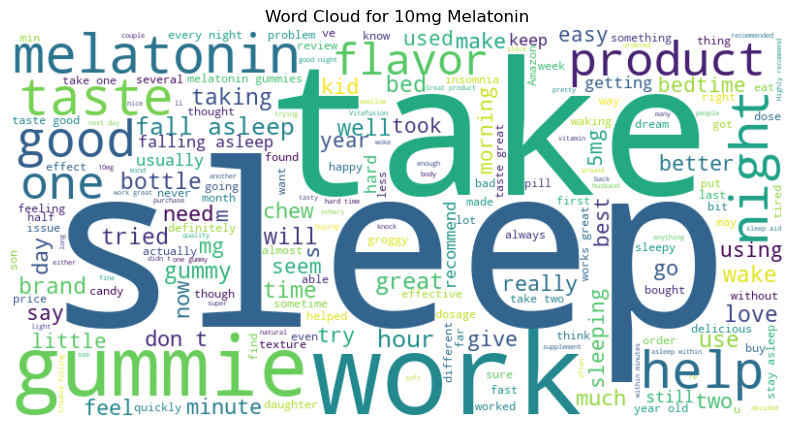

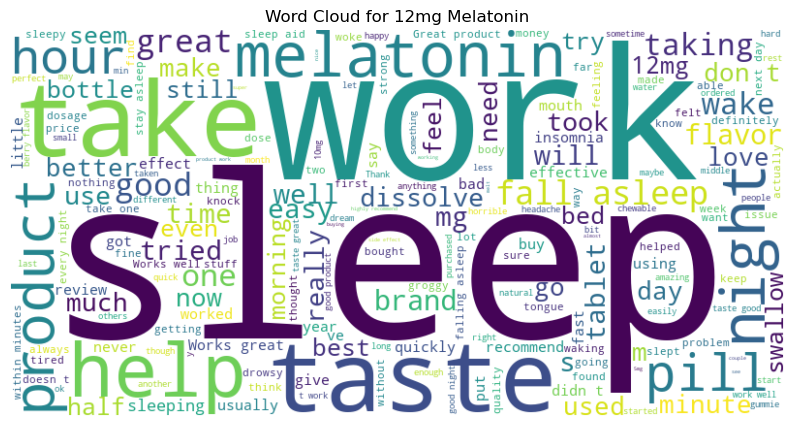

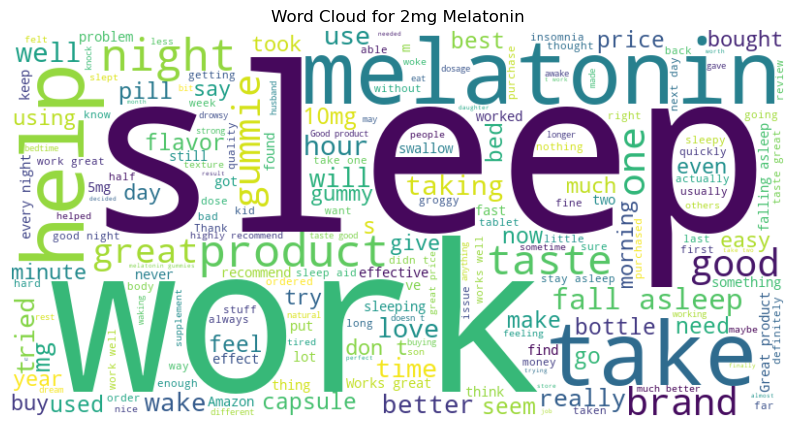

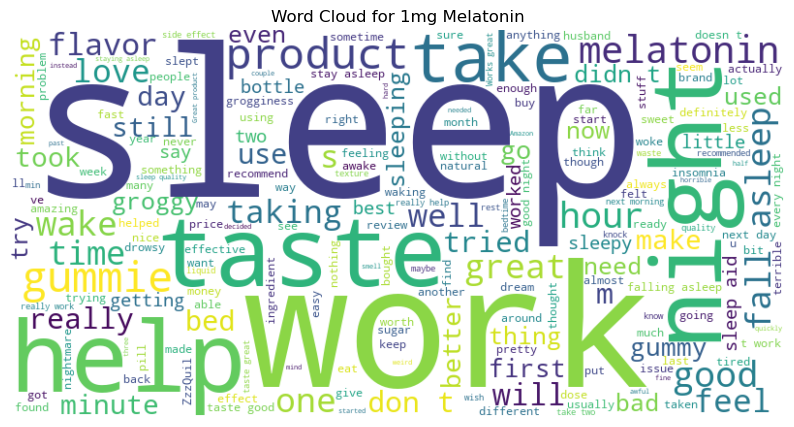

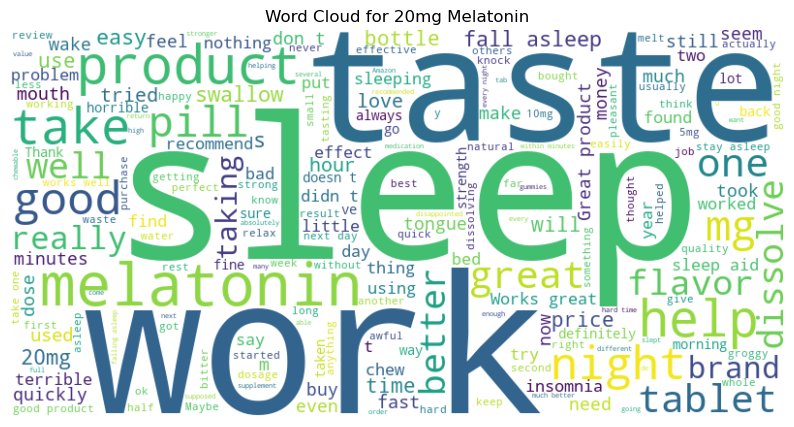

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each dose
for dose in df_cleaned['dose'].unique():
    reviews = df_cleaned[df_cleaned['dose'] == dose]['review_text'].str.cat(sep=' ')
    title = f"Word Cloud for {dose} Melatonin"
    generate_wordcloud(reviews, title)


In [23]:
df_cleaned.columns

Index(['product_title', 'average_rating', 'total_reviews', 'review_rating',
       'reviewed_country', 'review_text', 'review_header', 'input', 'dose',
       'sleep', 'insomnia', 'restful', 'sleeping', 'awake', 'tired'],
      dtype='object')

In [24]:
##NLP 
#removing stopwords, punctuations and lemmatizing all strings in review_text

In [25]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\d+mg', 'dose', text)  
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_text)

df_cleaned['cleaned_text'] = df_cleaned['review_text'].apply(preprocess_text)

df_cleaned['cleaned_text']

0       easy take use bought one came ultra security p...
1                                 love great flavor tasty
2       love sleepy time gummies work every time stay ...
3       thing ridiculously hard chew expensive waste d...
4       mine stuck together one big blob unable return...
                              ...                        
2695                                           taste good
2696    tried many melatonin product last year none se...
2697          love sleep soundly feel groggy next morning
2698    sure one gummy would work taking 3 month reall...
2699          dose dose per gummie definitely worth money
Name: cleaned_text, Length: 15880, dtype: object

In [26]:
df_cleaned

,product_title,average_rating,total_reviews,review_rating,reviewed_country,review_text,review_header,input,dose,sleep,insomnia,restful,sleeping,awake,tired,cleaned_text
0,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Easy to take and use. I bought these because t...,Quick and easy,B07PF1SN5B,10mg,False,False,False,False,False,False,easy take use bought one came ultra security p...
1,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Love these. Great flavor and tasty.,The best gummies,B07PF1SN5B,10mg,False,False,False,False,False,False,love great flavor tasty
2,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,I love these sleepy times gummies! They work e...,Great taste,B07PF1SN5B,10mg,True,False,False,False,True,False,love sleepy time gummies work every time stay ...
3,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,2,United States,These things are ridiculously hard to chew. Th...,Hard to Chew,B07PF1SN5B,10mg,False,False,False,False,False,False,thing ridiculously hard chew expensive waste d...
4,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,1,United States,Mine were all stuck together in one big blob. ...,Mine were melted together,B07PF1SN5B,10mg,False,False,False,False,False,False,mine stuck together one big blob unable return...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,1,United States,Doesn’t taste good at all,Taste like medicine,B079TD7HG2,2mg,False,False,False,False,False,False,taste good
2696,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,I have tried many melatonin products over the ...,Only product that works for me,B079TD7HG2,2mg,False,False,False,False,False,False,tried many melatonin product last year none se...
2697,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,Love to sleep soundly. Don't feel groggy next ...,Sleeping,B079TD7HG2,2mg,True,False,False,False,False,False,love sleep soundly feel groggy next morning
2698,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,I wasn't sure one gummy would work but it did....,Great nights sleep,B079TD7HG2,2mg,True,False,False,False,False,False,sure one gummy would work taking 3 month reall...


In [27]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#regex tokenizing lemmatizing and filtering stop words out
def preprocess_text(text):
    text = re.sub(r'\d+mg', 'dose', text)  
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_text)

df_cleaned['cleaned_header'] = df_cleaned['review_header'].apply(preprocess_text)

df_cleaned['cleaned_header']

0                 quick easy
1               best gummies
2                great taste
3                  hard chew
4       mine melted together
                ...         
2695     taste like medicine
2696            product work
2697                sleeping
2698       great night sleep
2699                    dose
Name: cleaned_header, Length: 15880, dtype: object

In [28]:
df_cleaned.head()

,product_title,average_rating,total_reviews,review_rating,reviewed_country,review_text,review_header,input,dose,sleep,insomnia,restful,sleeping,awake,tired,cleaned_text,cleaned_header
0,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Easy to take and use. I bought these because t...,Quick and easy,B07PF1SN5B,10mg,False,False,False,False,False,False,easy take use bought one came ultra security p...,quick easy
1,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Love these. Great flavor and tasty.,The best gummies,B07PF1SN5B,10mg,False,False,False,False,False,False,love great flavor tasty,best gummies
2,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,I love these sleepy times gummies! They work e...,Great taste,B07PF1SN5B,10mg,True,False,False,False,True,False,love sleepy time gummies work every time stay ...,great taste
3,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,2,United States,These things are ridiculously hard to chew. Th...,Hard to Chew,B07PF1SN5B,10mg,False,False,False,False,False,False,thing ridiculously hard chew expensive waste d...,hard chew
4,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,1,United States,Mine were all stuck together in one big blob. ...,Mine were melted together,B07PF1SN5B,10mg,False,False,False,False,False,False,mine stuck together one big blob unable return...,mine melted together


In [29]:
df_cleaned

,product_title,average_rating,total_reviews,review_rating,reviewed_country,review_text,review_header,input,dose,sleep,insomnia,restful,sleeping,awake,tired,cleaned_text,cleaned_header
0,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Easy to take and use. I bought these because t...,Quick and easy,B07PF1SN5B,10mg,False,False,False,False,False,False,easy take use bought one came ultra security p...,quick easy
1,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,Love these. Great flavor and tasty.,The best gummies,B07PF1SN5B,10mg,False,False,False,False,False,False,love great flavor tasty,best gummies
2,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,5,United States,I love these sleepy times gummies! They work e...,Great taste,B07PF1SN5B,10mg,True,False,False,False,True,False,love sleepy time gummies work every time stay ...,great taste
3,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,2,United States,These things are ridiculously hard to chew. Th...,Hard to Chew,B07PF1SN5B,10mg,False,False,False,False,False,False,thing ridiculously hard chew expensive waste d...,hard chew
4,vitafusion Max Strength Melatonin Gummy Supple...,4.6,5151,1,United States,Mine were all stuck together in one big blob. ...,Mine were melted together,B07PF1SN5B,10mg,False,False,False,False,False,False,mine stuck together one big blob unable return...,mine melted together
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,1,United States,Doesn’t taste good at all,Taste like medicine,B079TD7HG2,2mg,False,False,False,False,False,False,taste good,taste like medicine
2696,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,I have tried many melatonin products over the ...,Only product that works for me,B079TD7HG2,2mg,False,False,False,False,False,False,tried many melatonin product last year none se...,product work
2697,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,Love to sleep soundly. Don't feel groggy next ...,Sleeping,B079TD7HG2,2mg,True,False,False,False,False,False,love sleep soundly feel groggy next morning,sleeping
2698,"Natrol Melatonin Sleep Aid Gummy, Fall Asleep ...",4.7,2749,5,United States,I wasn't sure one gummy would work but it did....,Great nights sleep,B079TD7HG2,2mg,True,False,False,False,False,False,sure one gummy would work taking 3 month reall...,great night sleep


In [30]:
df_cleaned.to_csv('HW3.csv')

In [31]:
##deriving sentiment from review_text 
from textblob import TextBlob

# Function to get the sentiment of text
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity  
    return 'positive' if sentiment > 0 else 'negative'

# Applying sentiment analysis on review text
df_cleaned['sentiment'] = df_cleaned['review_text'].apply(get_sentiment)


In [32]:
# ##Named Entity Recognition
# import spacy

# # Load the English NLP model
# nlp = spacy.load('en_core_web_sm')

# # Function to extract entities
# def extract_entities(text):
#     doc = nlp(text)
#     return [(ent.text, ent.label_) for ent in doc.ents]

# # Applying NER on review text
# df_cleaned['named_entities'] = df_cleaned['review_text'].apply(extract_entities)


In [33]:
# df_cleaned['named_entities']

In [34]:
# df_cleaned = df_cleaned.drop(columns='named_entities')

In [35]:
# df_cleaned['cleaned_text']

In [36]:

# double worded entries being filtered
df_cleaned['unique_words'] = df_cleaned['cleaned_text'].apply(lambda text: ' '.join(set(text.split())))

# Now df['unique_words'] contains the unique words of each review in the 'cleaned_text' column


In [37]:
df_cleaned['unique_words']

0       get know old candy security powder difficult b...
1                                 love great flavor tasty
2       awake gummies stay sleepy love every tried wor...
3       get tablet day thing gummies hard anymore chew...
4       think one big right mind together melted sun a...
                              ...                        
2695                                           good taste
2696    difference happy read make many believe work p...
2697          morning next groggy love soundly feel sleep
2698    gummy good one help 3 would taste month taking...
2699               dose worth money gummie per definitely
Name: unique_words, Length: 15880, dtype: object

In [38]:
# df_cleaned.groupby('product_title')['average_rating'].mean()

In [39]:
# import texthero as hero
#trying texthero for text cleaning 
# df_cleaned['tfidf'] = hero.tfidf(df_cleaned['unique_words'])

In [40]:
# import texthero as hero
# df_cleaned['cleaned_unique_words'] = hero.clean(df_cleaned['unique_words'])

In [41]:
# df_cleaned[df_cleaned['cleaned_unique_words'].str.contains("zz", regex=False)]


In [42]:
from unidecode import unidecode

In [43]:
def clean_text(text):
    text = unidecode(text)

    text = re.sub(r'zzz+', 'sleep', text, flags=re.IGNORECASE)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove non-alphabetic characters and filter out short tokens
    tokens = [word for word in tokens if word.isalpha() and len(word) > 1]
    
    return ' '.join(tokens)


In [44]:
# Ensuring the data is in string format
df_cleaned['unique_words'] = df_cleaned['unique_words'].astype(str)

# cleaning function
df_cleaned['cleaned_unique_words'] = df_cleaned['unique_words'].apply(clean_text)


In [45]:
#TFIDF 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fitting and transform the text data
tfidf_matrix = vectorizer.fit_transform(df_cleaned['cleaned_unique_words'])

# Getting feature names to use as DataFrame column headers
tfidf_feature_names = vectorizer.get_feature_names_out()

# Convertting to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

#DataFrame
print(tfidf_df.head())

    aa  aaa  aaaaaaa  aaron   ab  abd  abdominal  ability  abit  able  ...  \
0  0.0  0.0      0.0    0.0  0.0  0.0        0.0      0.0   0.0   0.0  ...   
1  0.0  0.0      0.0    0.0  0.0  0.0        0.0      0.0   0.0   0.0  ...   
2  0.0  0.0      0.0    0.0  0.0  0.0        0.0      0.0   0.0   0.0  ...   
3  0.0  0.0      0.0    0.0  0.0  0.0        0.0      0.0   0.0   0.0  ...   
4  0.0  0.0      0.0    0.0  0.0  0.0        0.0      0.0   0.0   0.0  ...   

   zombified  zone  zonk  zonked  zonks  zoom  zquil   zz  zzquil  zzquill  
0        0.0   0.0   0.0     0.0    0.0   0.0    0.0  0.0     0.0      0.0  
1        0.0   0.0   0.0     0.0    0.0   0.0    0.0  0.0     0.0      0.0  
2        0.0   0.0   0.0     0.0    0.0   0.0    0.0  0.0     0.0      0.0  
3        0.0   0.0   0.0     0.0    0.0   0.0    0.0  0.0     0.0      0.0  
4        0.0   0.0   0.0     0.0    0.0   0.0    0.0  0.0     0.0      0.0  

[5 rows x 8389 columns]


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack


In [47]:
# df_cleaned = df_cleaned.drop(columns="reviewed_country")

In [48]:
# product_title  input   dose

In [49]:
# cleaned_unique_words  cleaned_header

In [50]:
#Encoding boolean to 0 1 
booleandf = df_cleaned.select_dtypes(include=[bool])
booleanDictionary = {True: 1, False: 0}

for column in booleandf:
    df_cleaned[column] = df_cleaned[column].map(booleanDictionary)

In [51]:
#encoding sentiment to 0 1
sentimentDictionary = {'positive': 1, 'negative': 0, }
df_cleaned['sentiment'] = df_cleaned['sentiment'].map(sentimentDictionary)


In [52]:
#One Hot Encoding categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(df_cleaned[['product_title','dose']])


In [53]:
vectorizer1= TfidfVectorizer(max_features=1000)  # limiting to the top 1000 features
tfidf_matrix_1 = vectorizer1.fit_transform(df_cleaned['cleaned_unique_words'])

In [54]:
vectorizer2= TfidfVectorizer(max_features=1000)  # similarly
tfidf_matrix_2 = vectorizer1.fit_transform(df_cleaned['cleaned_header'])

In [55]:
#numerical features
numerical_data = df_cleaned[['average_rating', 'total_reviews', 'review_rating','sleep','insomnia','restful','sleeping','awake','tired']].values




In [56]:
#establishing features in hstack
features = np.hstack([numerical_data, categorical_data, tfidf_matrix_1.toarray(),tfidf_matrix_2.toarray()])


In [57]:
df_cleaned['dose'].value_counts()

dose
2mg     5891
12mg    5749
10mg    1946
1mg     1294
20mg    1000
Name: count, dtype: int64

In [58]:
y = df_cleaned['sentiment'].values

In [59]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# put data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# init and train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

# predict on the test set
y_pred_test = clf.predict(X_test)

# eval the model
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))

print("Accuracy Test:", accuracy_score(y_test, y_pred_test))


Accuracy Train: 0.9993702770780857
Accuracy Test: 0.8762594458438288


In [ ]:
##

In [124]:
#encoding for dose to try 
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable if it's categorical
encoder = LabelEncoder()
df_cleaned['dose'] = encoder.fit_transform(df_cleaned['dose'])

In [125]:
# features = df_cleaned[['average_ratingx', 'total_reviews', 'review_rating']]  # example features
y = df_cleaned['dose']

In [126]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Sparse=False means the output will be a dense matrix
categorical_data = encoder.fit_transform(df_cleaned[['product_title', 'input','sentiment']])


In [127]:
vectorizer1= TfidfVectorizer(max_features=1000)  # Limit to the top 1000 features
tfidf_matrix_1 = vectorizer1.fit_transform(df_cleaned['cleaned_unique_words'])

In [128]:
vectorizer2= TfidfVectorizer(max_features=1000)  # Limit to the top 1000 features
tfidf_matrix_2 = vectorizer1.fit_transform(df_cleaned['cleaned_header'])

In [130]:
numerical_data = df_cleaned[['average_rating', 'total_reviews', 'review_rating','sleep','insomnia','restful','sleeping','awake','tired']].values


In [131]:
features = np.hstack([numerical_data, categorical_data, tfidf_matrix_1.toarray(),tfidf_matrix_2.toarray()])


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Initialize and train a classifier|
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

# Predict on the test set
y_pred_test = clf.predict(X_test)

# Evaluate the model
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))

print("Accuracy Test:", accuracy_score(y_test, y_pred_test))


Accuracy Train: 1.0
Accuracy Test: 1.0


In [133]:
cm = confusion_matrix(y_train, y_pred_train) 
print(cm)

[[1578    0    0    0    0]
 [   0 4605    0    0    0]
 [   0    0 1006    0    0]
 [   0    0    0  798    0]
 [   0    0    0    0 4717]]


In [ ]:
# import re

# def extract_dose(title):
#     # This regex looks for numbers followed by 'mg' or 'milligrams', case-insensitive, possibly separated by spaces
#     pattern = r'(\d+)\s*(mg|milligrams)\b'
#     match = re.search(pattern, title, re.IGNORECASE)
#     if match:
#         # This standardizes the output to the format '10mg'
#         return f"{match.group(1)}mg"
#     return None

# df['dose'] = df['product_title'].apply(extract_dose)


In [ ]:
# df

In [ ]:
# df['product_title'].tail(1000)

In [ ]:
# # Check some of the entries where dose is NaN
# missing_dose_titles = df[df['dose'].isnull()]['product_title'].unique()
# print(missing_dose_titles[:20])  # Print the first 20 unique titles with missing dose

In [ ]:
# import re

# def extract_dose(title):
#     # Pattern to capture doses in milligrams; allows for some variation in spacing and capitalization
#     # Considers whole numbers and decimals, followed by 'mg' or 'milligrams'
#     pattern = r'(\d+\.?\d*)\s*(mg|milligrams?)\b'
#     match = re.search(pattern, title, re.IGNORECASE)
#     if match:
#         # Returns the dose with 'mg' to standardize the output
#         return f"{match.group(1)}mg"
#     return None

# # Apply the function to the DataFrame
# df['dose'] = df['product_title'].apply(extract_dose)
# new_null_count = df['dose'].isnull().sum()
# new_percentage = (new_null_count / df.shape[0]) * 100

# print(f"Updated number of null values in 'dose': {new_null_count}")
# print(f"Updated percentage of null values in 'dose': {new_percentage:.2f}%")


In [ ]:
# # Display product titles where 'dose' extraction failed
# failed_extractions = df[df['dose'].isnull()]['product_title'].head()
# print("Titles without dose info (sample):", failed_extractions)  # Show a sample of 20 titles
